# Exercise 2
# Exploring hypothesis testing - Fire emissions

* **Description**: Reads in netcdf files of CESM2-LE total ice area, fire emission experiments, and makes plots
* **Creator**: Alice DuVivier
* **Date**: March 2025

## Background

The CESM2-LE (Rodgers et al. 2021) is a similar set of ensembles as the CESM1-LE an experiment we just explored. The 50-member ensemble uses 1850-2014 historical radiative forcing and 2015-2100 SSP370 radiative forcing. Ensemble spread is generated in two ways: 
1) Micro-perturbations are generated in some ensembles by using round-off differences ($10^{-14}$K) in the initial atmospheric temperature field (this is the same as CESM1-LE).
2) Macro-perturbations are generated in other ensembles by using a different ice/ocean initial state in 1850.

The mid-latitudes are far from the poles, but there is transport into the Arctic from these latitudes. Here we want to explore how black carbon (BC) emissions from biomass burning during fires may impact sea ice.

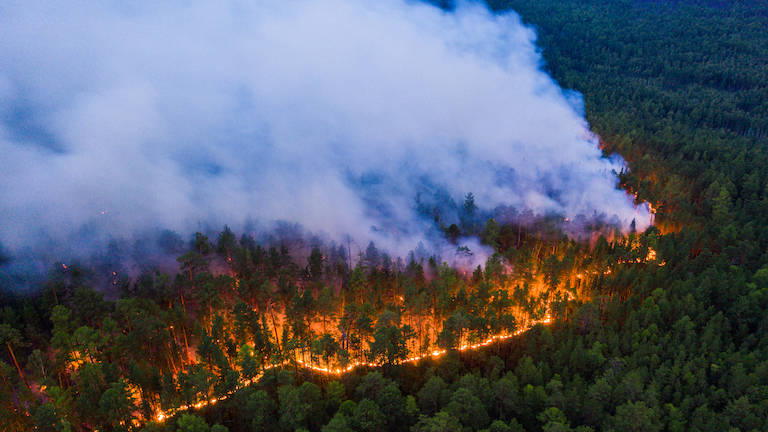

In CMIP6, satellite observed BC emissions from fires was used for a short period and has large interannual variability (spikes and valleys) from 1996-2015. These emissions were used as default for CESM2 historical simulations. We want to test if and how the biomass burning emission variability from fires impact sea ice trends. In the SMBB experiments there has been a smoother applied to the biomass burning emissions dataset such that there is the same total biomass burning, but the variability is significantly different (DeRepentigny et al. 2022).

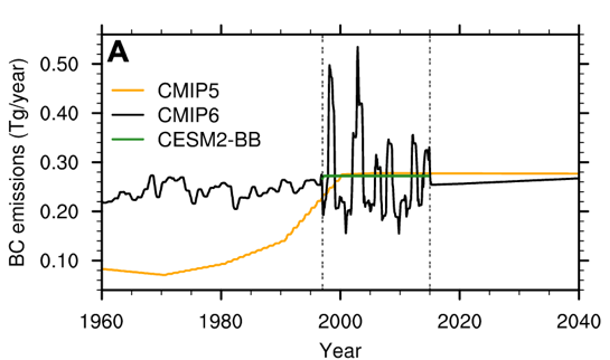

Black carbon emissions from 40-70N due to biomass burning.

- DeRepentigny et al. 2022. “Enhanced simulated early 21st century Arctic sea ice loss due to CMIP6 biomass burning emissions.” https://doi.org/10.1126/sciadv.abo2405
- Rodgers et al. 2021. “Ubiquity of human-induced changes in climate variability."  https://doi.org/10.5194/esd-12-1393-2021


In [1]:
# Load packages we'll need
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load and manipulate all the data

In [2]:
# set data directory
data_dir = 'data/'

## Load and subset CESM2-LE data
- Keep just September data

In [3]:
# Set the data to input
fin = 'LE2_aicetot_nh_1870-2100.nc'

# read in the data
ds1 = xr.open_mfdataset(data_dir + fin)

In [4]:
# keep only September data (note that indexing starts at 0, so September is month 8)
mm = 8
data1 = ds1.aice_monthly.isel(nmonth=8)

In [5]:
# convert data from m^2 to km^2
data1 = data1/(1000.0 * 1000.0)

In [6]:
# create an array of years for this data
years_data1 = np.arange(1870,2101,1)

In [7]:
# look at data
data1

<xarray.DataArray 'aice_monthly' (n_members: 50, nyr: 231)> Size: 46kB
dask.array<truediv, shape=(50, 231), dtype=float32, chunksize=(50, 231), chunktype=numpy.ndarray>
Dimensions without coordinates: n_members, nyr

### Questions:
- How many years of data do we have?
- How many ensemble members are there?

## Load and subset CESM2-SMBB data
- Keep just September data

In [8]:
# Set the data to input
fin = 'LE2smbb_aicetot_nh_1870-2100.nc'

# read in the data
ds2 = xr.open_mfdataset(data_dir + fin)

In [9]:
# keep only September data (note that indexing starts at 0, so September is month 8)
mm = 8
data2 = ds2.aice_monthly.isel(nmonth=8)

In [10]:
# convert data from m^2 to km^2
data2 = data2/(1000.0 * 1000.0)

In [11]:
# create an array of years for this data
years_data2 = np.arange(1870,2101,1)

In [12]:
# look at data
data2

<xarray.DataArray 'aice_monthly' (n_members: 40, nyr: 231)> Size: 37kB
dask.array<truediv, shape=(40, 231), dtype=float32, chunksize=(40, 231), chunktype=numpy.ndarray>
Dimensions without coordinates: n_members, nyr

### Questions:
- How many years of data do we have?
- How many ensemble members are there?

# Exercise 1

- Activity: Plot the ensemble means and standard deviations for CESM2-LE

In [13]:
# calculate CESM2-LE ensemble mean and standard deviation
data1_mean = data1.mean(dim='n_members')
data1_std = data1.std(dim='n_members')

# get the total number of ensemble members 
n_ens_1 = len(data1.n_members)

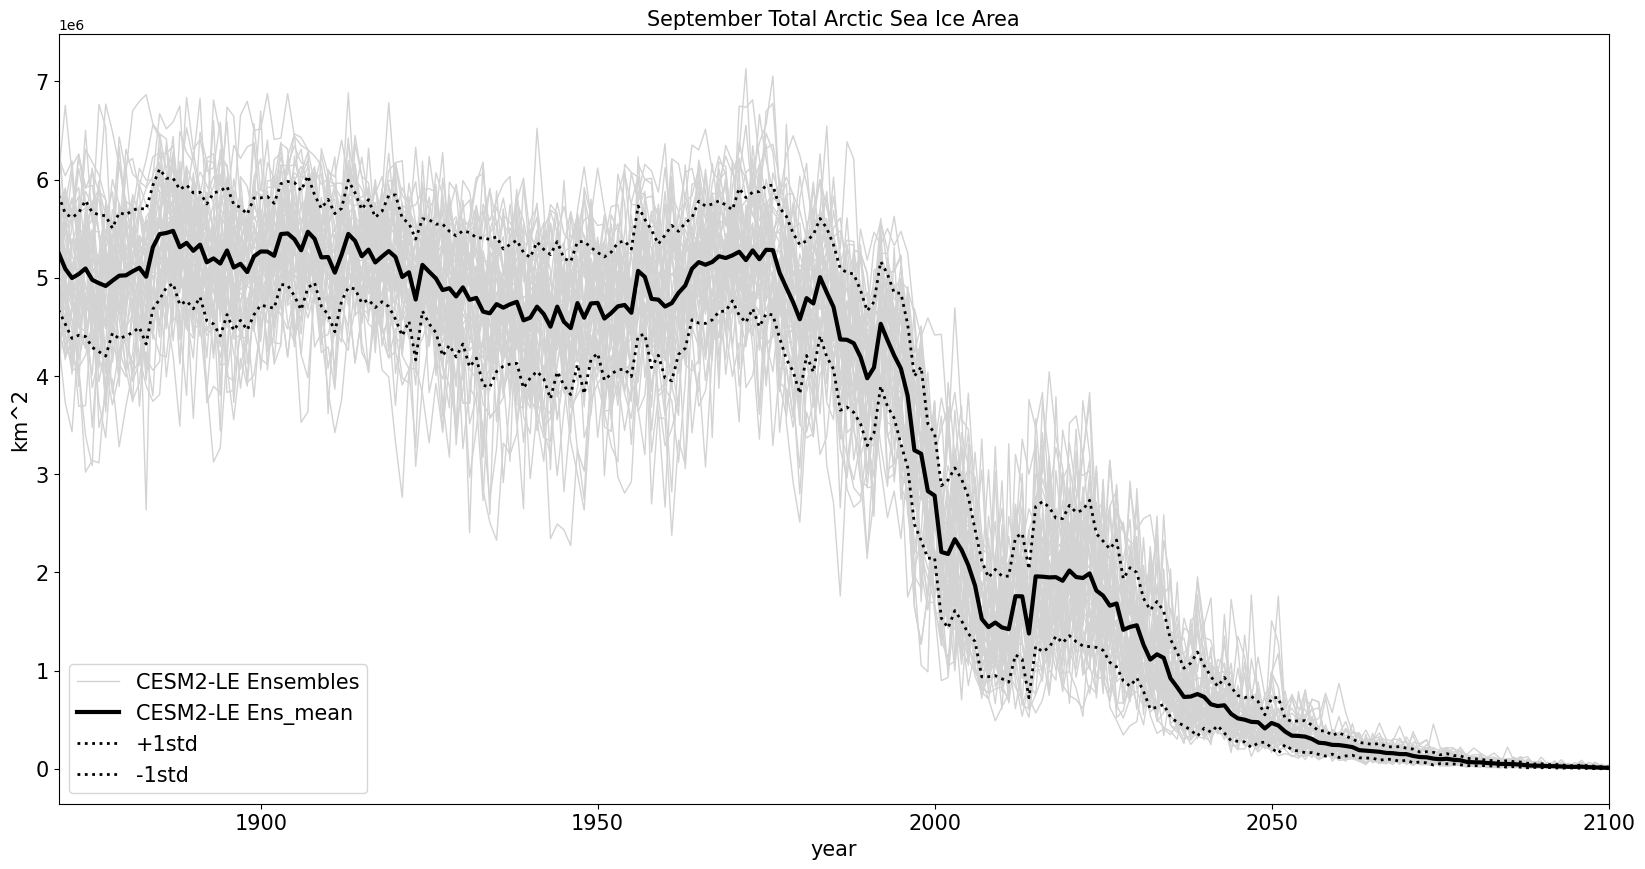

In [14]:
# create figure
fig = plt.figure(figsize=(20,10))

###
# plot all CESM2-LE model data
###
ii=0
for ii in range(n_ens_1):
    plt.plot(years_data1,data1[ii,:],color="lightgrey",linestyle='-',linewidth=1,label='_nolegend_');
# overlay first ensemble member to get it on the legend
plt.plot(years_data1,data1.isel(n_members=0),label='CESM2-LE Ensembles',color='lightgrey',linewidth=1)
# overlay the ensemble mean and +/-1 standard deviations
plt.plot(years_data1,data1_mean,label='CESM2-LE Ens_mean',color='black',linestyle='-',linewidth=3)
plt.plot(years_data1,data1_mean+data1_std,label='+1std',color='black',linestyle=':',linewidth=2)
plt.plot(years_data1,data1_mean-data1_std,label='-1std',color='black',linestyle=':',linewidth=2)

# make nicer axes
plt.title('September Total Arctic Sea Ice Area',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.xticks(fontsize=15)
plt.xlim([1870,2100])
plt.ylabel('km^2',fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='lower left', fontsize=15, ncol=1);

### Questions:
- How does this compare to the CESM1-LE we previously examined? Is it similar to what you expect?
- Is there anything that looks weird in this timeseries?

# Exercise 2
- Activity: Plot the ensemble means and standard deviations for CESM2-LE and the experiment

In [15]:
# calculate ensemble mean and standard deviation
data2_mean = data2.mean(dim='n_members')
data2_std = data2.std(dim='n_members')

# get the total number of ensemble members 
n_ens_2 = len(data2.n_members)

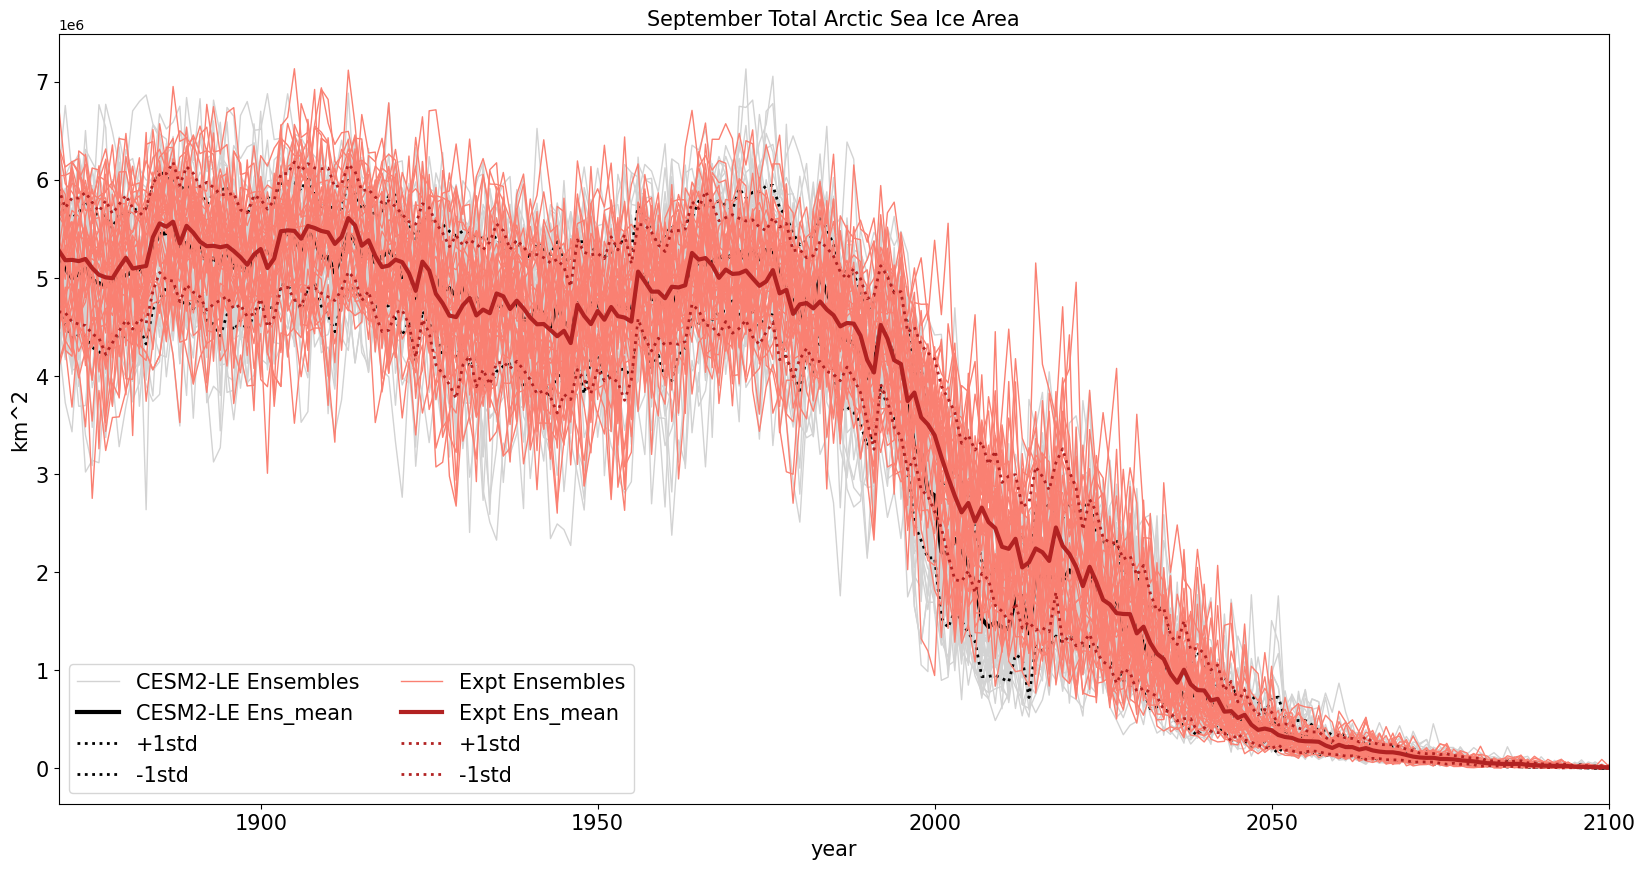

In [16]:
# create figure
fig = plt.figure(figsize=(20,10))

###
# plot all CESM2-LE model data
###
ii=0
for ii in range(n_ens_1):
    plt.plot(years_data1,data1[ii,:],color="lightgrey",linestyle='-',linewidth=1,label='_nolegend_');
# overlay first ensemble member to get it on the legend
plt.plot(years_data1,data1.isel(n_members=0),label='CESM2-LE Ensembles',color='lightgrey',linewidth=1)
# overlay the ensemble mean and +/-1 standard deviations
plt.plot(years_data1,data1_mean,label='CESM2-LE Ens_mean',color='black',linestyle='-',linewidth=3)
plt.plot(years_data1,data1_mean+data1_std,label='+1std',color='black',linestyle=':',linewidth=2)
plt.plot(years_data1,data1_mean-data1_std,label='-1std',color='black',linestyle=':',linewidth=2)
###
# plot all experimental model data
###
ii=0
for ii in range(n_ens_2):
    plt.plot(years_data2,data2[ii,:],color="salmon",linestyle='-',linewidth=1,label='_nolegend_');
# overlay first ensemble member to get it on the legend
plt.plot(years_data2,data2.isel(n_members=0),label='Expt Ensembles',color='salmon',linewidth=1)
# overlay the ensemble mean and +/-1 standard deviations
plt.plot(years_data2,data2_mean,label='Expt Ens_mean',color='firebrick',linestyle='-',linewidth=3)
plt.plot(years_data2,data2_mean+data2_std,label='+1std',color='firebrick',linestyle=':',linewidth=2)
plt.plot(years_data2,data2_mean-data2_std,label='-1std',color='firebrick',linestyle=':',linewidth=2)

# make nicer axes
plt.title('September Total Arctic Sea Ice Area',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.xticks(fontsize=15)
plt.xlim([1870,2100])
plt.ylabel('km^2',fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='lower left', fontsize=15, ncol=2);

### Questions:
- How does the experiment look different than the CESM2-LE? (Mean state and trends)
- When we plot all ensemble members for both experiments, is it easy to see any differences in the experiments?

## Exercise 3

- Now, zoom in on the previous figure and plot only ensemble means and standard deviations

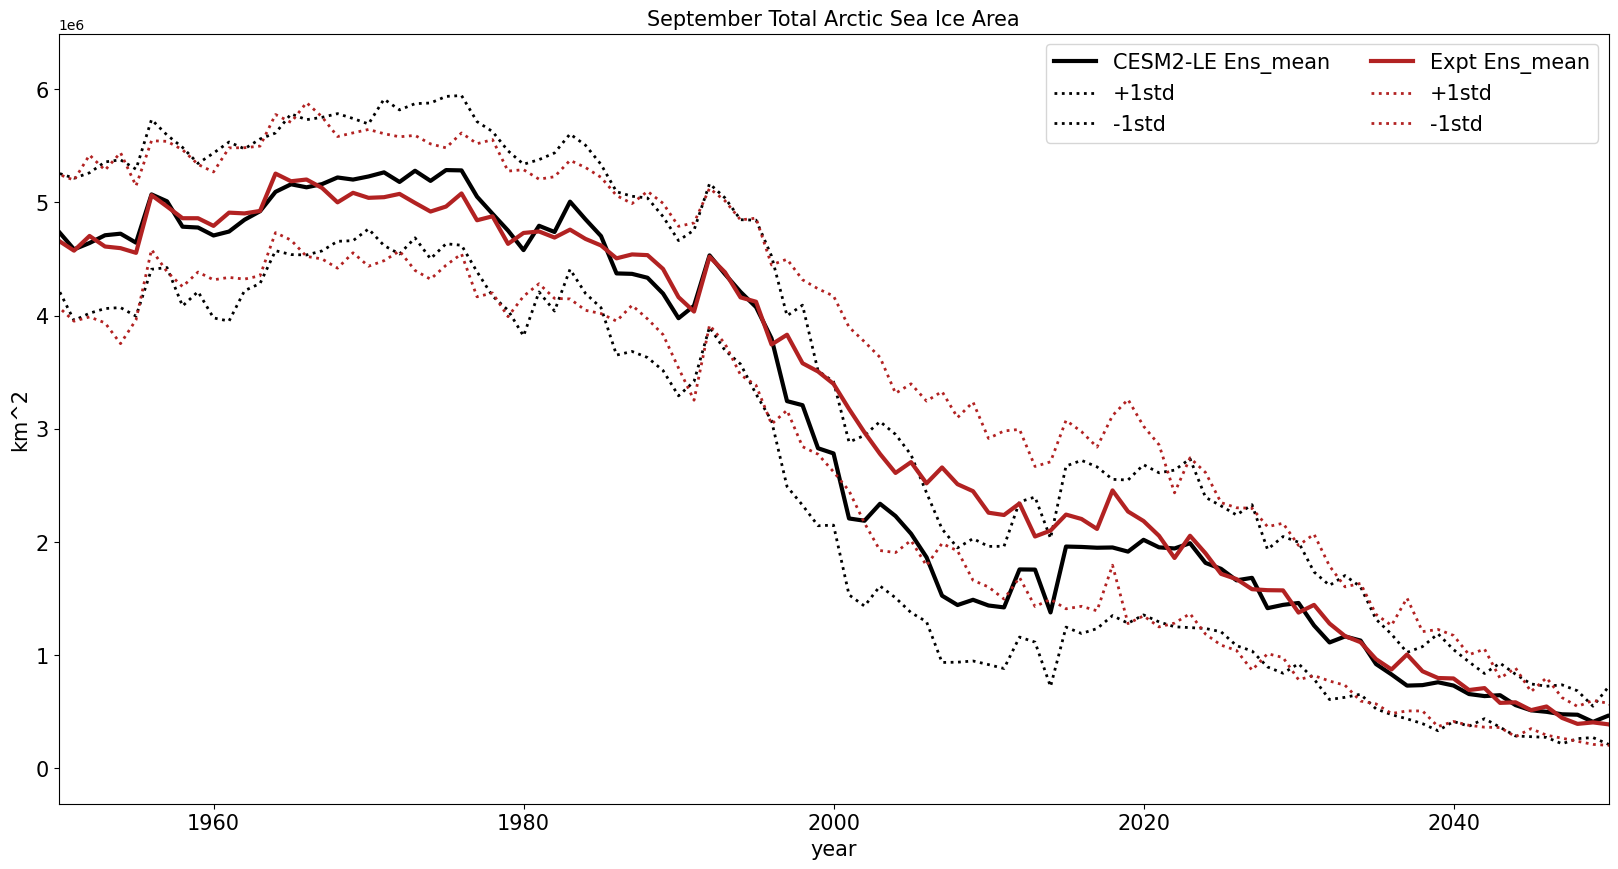

In [17]:
# create figure
fig = plt.figure(figsize=(20,10))

###
# plot all CESM2-LE model data
###
# overlay the ensemble mean and +/-1 standard deviations
plt.plot(years_data1,data1_mean,label='CESM2-LE Ens_mean',color='black',linestyle='-',linewidth=3)
plt.plot(years_data1,data1_mean+data1_std,label='+1std',color='black',linestyle=':',linewidth=2)
plt.plot(years_data1,data1_mean-data1_std,label='-1std',color='black',linestyle=':',linewidth=2)
###
# plot all experimental model data
###
# overlay the ensemble mean and +/-1 standard deviations
plt.plot(years_data2,data2_mean,label='Expt Ens_mean',color='firebrick',linestyle='-',linewidth=3)
plt.plot(years_data2,data2_mean+data2_std,label='+1std',color='firebrick',linestyle=':',linewidth=2)
plt.plot(years_data2,data2_mean-data2_std,label='-1std',color='firebrick',linestyle=':',linewidth=2)

# make nicer axes
plt.title('September Total Arctic Sea Ice Area',fontsize=15)
plt.xlabel('year',fontsize=15)
plt.xticks(fontsize=15)
plt.xlim([1950,2050])
plt.ylabel('km^2',fontsize=15)
plt.yticks(fontsize=15)
plt.legend(loc='upper right', fontsize=15, ncol=2);

### Questions:
- How does the experiment look different than the CESM2-LE? (Mean state and trends)
- Are there any particular time periods that stand out to you?
- Do you think that the biomass burning emissions variability lead to statistically significant changes in total sea ice area?
- Do you think that there are enough of the experimental ensembles to be certain of your conclusions?
- Are there other aspects of the sea ice state or Earth system you think would be interesting to investigate in these experiments? (e.g. sea ice thickness, sea surface temperature, cloud cover, etc.)